In [ ]:
from tensorflow import keras
from keras import activations
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print('x_train shape :', x_train.shape)
print('x_test shape :',x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (50000, 32, 32, 3)
x_test shape : (10000, 32, 32, 3)
y_train shape : (50000, 1)
y_test shape : (10000, 1)


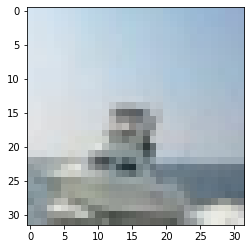

In [ ]:
plt.imshow(x_train[100])

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
from keras.layers import *
from keras.models import Sequential, Model

In [ ]:
input_size = (x_train.shape[1], x_train.shape[2], x_train.shape[3])

In [ ]:
# generator = Sequential()

# generator.add(Input(x_train.shape[1]))
# generator.add(Dense(256 * 7 * 7, activation='LeakyReLU'))
# generator.add(Reshape((7, 7, 256)))

# generator.add(UpSampling2D())
# generator.add(Conv2D(256, 3, activation='LeakyReLU'))
# generator.add(BatchNormalization())

# generator.add(UpSampling2D())
# generator.add(Conv2D(128, 3, activation='LeakyReLU'))
# generator.add(BatchNormalization())

# generator.add(Conv2D(x_train.shape[3], 3, activation='tanh'))

# generator.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 12544)             413952    
                                                                 
 reshape_18 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 up_sampling2d_27 (UpSamplin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 12, 12, 256)       590080    
                                                                 
 batch_normalization_26 (Bat  (None, 12, 12, 256)      1024      
 chNormalization)                                                
                                                                 
 up_sampling2d_28 (UpSamplin  (None, 24, 24, 256)    

In [ ]:
#GAN에서 generator와 discriminator를 구현할 때 필요한 기법들이 있다. generator의 마지막 layer의 activation function은 softmax나 sigmoid가 아닌 tanh를 쓰는 것 등

G = Sequential()

G.add(Input(x_train.shape[1], ))
G.add(Dense(256 * 7 * 7, activation='LeakyReLU'))
G.add(Reshape((7, 7, 256)))

G.add(UpSampling2D())
G.add(Conv2D(256, 3))
G.add(BatchNormalization(momentum=0.8))
G.add(Activation("LeakyReLU"))

G.add(UpSampling2D())
G.add(Conv2D(128, 3))
G.add(BatchNormalization(momentum=0.8))
G.add(Activation("LeakyReLU"))

G.add(Conv2D(x_train.shape[3], 3, activation='tanh'))


G.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12544)             413952    
                                                                 
 reshape_20 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 up_sampling2d_31 (UpSamplin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 12, 12, 256)       590080    
                                                                 
 batch_normalization_32 (Bat  (None, 12, 12, 256)      1024      
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 12, 12, 256)     

In [ ]:
D = Sequential()

D.add(Input(input_size))

D.add(Conv2D(32, 3, activation='LeakyReLU'))
D.add(BatchNormalization(momentum=0.9))
D.add(Dropout(0.25))

D.add(Conv2D(64, 3, activation='LeakyReLU'))
D.add(BatchNormalization(momentum=0.9))
D.add(Dropout(0.25))

D.add(Conv2D(128, 3, activation='LeakyReLU'))
D.add(BatchNormalization(momentum=0.9))
D.add(Dropout(0.25))

D.add(Conv2D(256, 3, activation='LeakyReLU'))
D.add(BatchNormalization(momentum=0.9))
D.add(Dropout(0.25))

D.add(Flatten())
D.add(Dense(1, activation='softmax'))

D.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_34 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_35 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)      

https://github.com/eriklindernoren/Keras-GAN/blob/master/dcgan/dcgan.py

In [ ]:
batch = 50
epoch = 15

In [ ]:
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, '-', label='Training acc')
    plt.plot(epochs, val_acc, '-', label='Validation acc')
    plt.legend()

    plt.subplot(122)
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, '-', label='Training loss')
    plt.plot(epochs, val_loss, '-', label='Validation loss')
    plt.legend()

    plt.show()

In [ ]:
plot_learning_curve(generator_history)